__7월 12일__

[학습 내용]
1. 지난 시간 내용을 리뷰를 통해 기본을 다진다.
    - 지난 시간 복습

2. 팀별 개인별 자료 정리 및 마무리 시간을 갖는다.
    - 개인별 Github 정리
    - 개인별 Notion 정리
    
3. dacon 대회에 참여를 해 본다.
    - 계정을 만들기
    - 데이터 다운로드 및 데이터 살펴보기
    - 기본 모델 만들고 제출해 보기
4. 데이터 전처리 수행 및 모델 개선
5. 개별 면담(수업 후, 10분 2명)

In [71]:
import pandas as pd
import os
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')

In [8]:
in_path = './235745_parking_data/'
train = pd.read_csv(in_path+'train.csv')
test = pd.read_csv(in_path+"test.csv")
sub = pd.read_csv(in_path+"sample_submission.csv")
age = pd.read_csv(in_path+"age_gender_info.csv")

train.shape, test.shape, sub.shape, age.shape

((2952, 15), (1022, 14), (150, 2), (16, 23))

In [16]:
train.head()
# train.info()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [17]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [20]:
col_cat = ['임대건물구분', '지역', '공급유형','자격유형','도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수']
for col in col_cat :
    print(col, train[col].unique(), sep='\n')

임대건물구분
['아파트' '상가']
지역
['경상북도' '경상남도' '대전광역시' '경기도' '전라북도' '강원도' '광주광역시' '충청남도' '부산광역시' '제주특별자치도'
 '울산광역시' '충청북도' '전라남도' '대구광역시' '서울특별시' '세종특별자치시']
공급유형
['국민임대' '공공임대(50년)' '영구임대' '임대상가' '공공임대(10년)' '공공임대(분납)' '장기전세' '공공분양'
 '행복주택' '공공임대(5년)']
자격유형
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O']
도보 10분거리 내 지하철역 수(환승노선 수 반영)
[ 0.  1. nan  2.  3.]
도보 10분거리 내 버스정류장 수
[ 3.  1.  2.  6. 10.  5.  4.  7. 12. 14.  8.  0. 20. 11. 16. 15. nan 19.]


### 데이터셋 이해를 위한 시각화

In [39]:
grp_sum = train.groupby("지역").sum().loc[:,['총세대수','공가수',"등록차량수"]] 
grp_sum
# grp_avg = train.groupby("지역").mean().loc[:,[]]

,총세대수,공가수,등록차량수
지역,,,
강원도,102717,1681.0,72602.0
경기도,594150,8210.0,493561.0
경상남도,256693,4266.0,152854.0
경상북도,74987,2648.0,76258.0
광주광역시,109468,2406.0,103192.0
대구광역시,88012,1822.0,89099.0
대전광역시,342033,3043.0,142415.0
부산광역시,495631,4490.0,103827.0
서울특별시,49848,542.0,56469.0


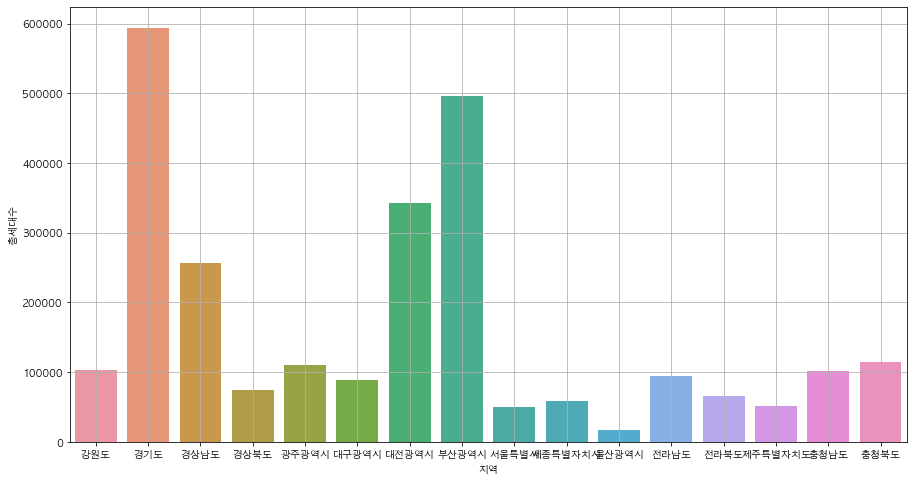

In [40]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')

import warnings
warnings.filterwarnings(action='ignore')


plt.figure(figsize=(15,8))
sns.barplot(grp_sum.index, grp_sum["총세대수"])
plt.grid()

In [45]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [46]:
sel = ['총세대수']
X_train = train[sel]
X_test = test[sel]
y_train = train['등록차량수']

In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([524.31256846, 524.31256846, 524.31256846, ..., 424.88994317,
       424.88994317, 424.88994317])

In [63]:
pred.shape, test.shape, sub.shape # 대표값을 추출해서 제출하라

((1022,), (1022, 14), (150, 2))

In [78]:
# pred 결과를 단지코드에 맞게 모든 데이터항에 평균값을 넣어주자
test['등록차량수']= pred
test.groupby("단지코드")['등록차량수'].mean()

단지코드
C1003     451.081925
C1006     725.028675
C1016     494.646140
C1019     408.586771
C1030     342.839551
            ...     
C2653     557.720709
C2675     459.634409
C2676    1010.200560
C2688     362.884435
C2691     527.252485
Name: 등록차량수, Length: 150, dtype: float64

In [72]:
test["등록차량수평균"] = test.groupby("단지코드")["등록차량수"].transform(np.mean)
test.head()
# pd.merge(test, test.groupby('단지코드')['등록차량수'].mean(), on='단지코드').head() 도 동일하게 작동함

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,등록차량수평균
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0,524.312568,524.312568
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0,524.312568,524.312568
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0,524.312568,524.312568
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0,524.312568,524.312568
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0,524.312568,524.312568


In [75]:
test_new = test.drop_duplicates(["단지코드"], keep='first').reset_index()
print(test_new.shape)
test_new

(150, 17)


,index,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,등록차량수평균
0,0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0,524.312568,524.312568
1,8,C1128,1354,아파트,경기도,국민임대,39.79,368,9.0,H,22830000,189840,0.0,3.0,1216.0,684.671641,684.671641
2,17,C1456,619,아파트,부산광역시,국민임대,33.40,82,18.0,A,19706000,156200,0.0,16.0,547.0,488.231777,488.231777
3,26,C1840,593,아파트,전라북도,국민임대,39.57,253,7.0,A,14418000,108130,0.0,3.0,543.0,481.282884,481.282884
4,30,C1332,1297,아파트,경기도,국민임대,39.99,282,11.0,H,28598000,203050,0.0,2.0,1112.0,669.437530,669.437530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,996,C2456,349,아파트,제주특별자치도,국민임대,26.44,24,17.0,H,6992000,117000,0.0,4.0,270.0,416.070194,416.070194
146,1000,C1266,596,아파트,충청북도,국민임대,26.94,164,35.0,H,8084000,149910,0.0,1.0,593.0,482.084679,482.084679
147,1005,C2152,120,아파트,강원도,영구임대,24.83,66,9.0,C,-,-,0.0,1.0,40.0,354.866481,354.866481
148,1007,C1267,675,아파트,경상남도,국민임대,24.87,28,38.0,H,6882000,104370,0.0,1.0,467.0,503.198624,503.198624


In [85]:
sub_df = test_new[["단지코드","등록차량수평균"]]
sub_df.columns = ["code", 'num']
sub_df.to_csv("baseline_0712.csv", index=False)
print(os.listdir())
sub_df

['.DS_Store', '235745_parking_data', 'baseline_0712.csv', '.ipynb_checkpoints', 'class28_0712.ipynb']


,code,num
0,C1072,524.312568
1,C1128,684.671641
2,C1456,488.231777
3,C1840,481.282884
4,C1332,669.437530
...,...,...
145,C2456,416.070194
146,C1266,482.084679
147,C2152,354.866481
148,C1267,503.198624


> 제출 : *baseline_0712.csv*  
> 결과 : 246.91677 (336위)

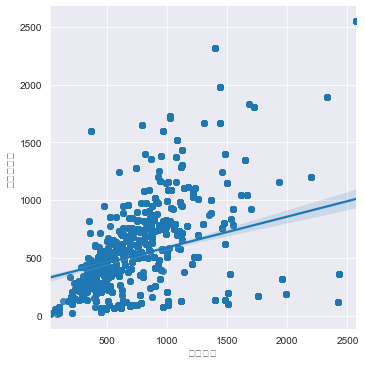

In [61]:
sns.set_style("darkgrid")
sns.lmplot(x="총세대수", y='등록차량수', data=train)

In [68]:
import plotly.express as px

px.scatter( train, x='총세대수', y='등록차량수', trendline='ols', hover_name='단지코드')